In [68]:
import numpy as np
import pandas as pd


In [69]:
dataset = pd.read_csv('salary.csv')


In [70]:
print(dataset.shape)
dataset.head()

(32561, 5)


,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K


In [71]:
income_set = set(dataset['income'])
dataset['income'] = dataset['income'].map({'<=50K': 0, '>50K': 1}).astype(int)
print(dataset.head)



<bound method NDFrame.head of        age  education.num  capital.gain  hours.per.week  income
0       90              9             0              40       0
1       82              9             0              18       0
2       66             10             0              40       0
3       54              4             0              40       0
4       41             10             0              40       0
...    ...            ...           ...             ...     ...
32556   22             10             0              40       0
32557   27             12             0              38       0
32558   40              9             0              40       1
32559   58              9             0              40       0
32560   22              9             0              20       0

[32561 rows x 5 columns]>


In [72]:
X = dataset.iloc[:,:-1].values
X

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]], dtype=int64)

In [73]:
Y = dataset.iloc[:,-1]
Y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int32

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.25, random_state=0)

In [76]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

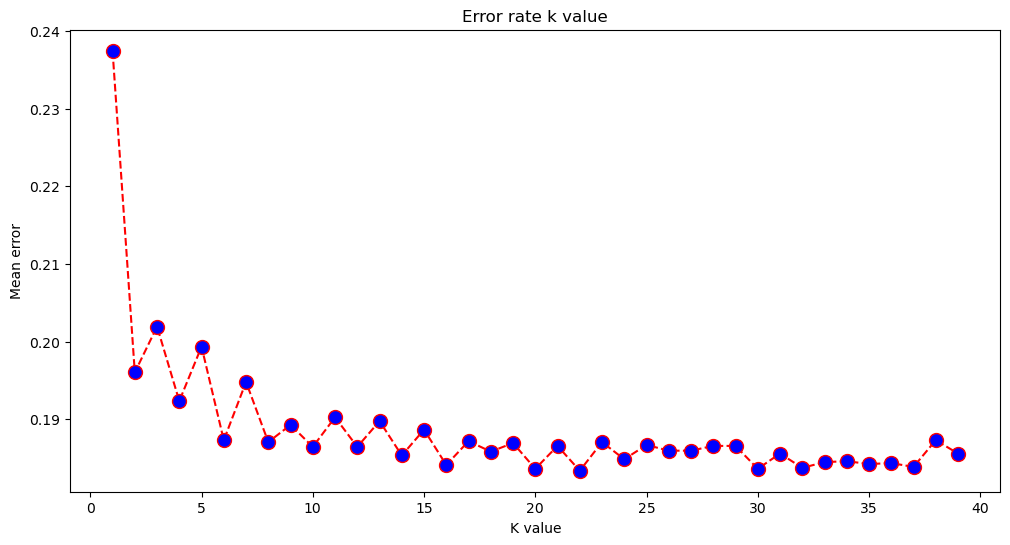

In [77]:
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Calculating the error for k value between 1 and 40
for i in range(1,40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,Y_train)
    pred_i = model.predict(X_test)
    error.append(np.mean(pred_i != Y_test))
    
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color= 'red',linestyle='dashed',marker= 'o',markerfacecolor='blue',markersize=10)
plt.title('Error rate k value')
plt.xlabel('K value')
plt.ylabel('Mean error')
plt.show()
    
    

In [78]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 16,metric= 'minkowski',p=2)
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=16)

In [80]:
age= int(input("Enter new employee's age: "))
edu =int(input("Enter new employee's education: "))
cg = int(input("Enter new employee's Capital Gain: "))
wh = int(input("Enter new employee's hour per week: "))
newEmp= [[age,edu,cg,wh]]
results= model.predict(sc.transform(newEmp))
print(results)

if results==1:
    print('Employee might get salary above 50k')
else:
    print('employee might not get salary above 50k')
    


Enter new employee's age: 68
Enter new employee's education: 9
Enter new employee's Capital Gain: 0
Enter new employee's hour per week: 40
[0]
employee might not get salary above 50k


In [92]:
##now predict for all test data
Y_pred = model.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1),np.array(Y_test).reshape(len(Y_test),1)),1))


[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [89]:
##evaluating the model
from sklearn.metrics import confusion_matrix, accuracy_score
cm= confusion_matrix(Y_test,Y_pred)

print('confusion matrix:')
print(cm)

print('accuracy of the model: {0}%'.format(accuracy_score(Y_test,Y_pred)*100))


confusion matrix:
[[5883  310]
 [1189  759]]
accuracy of the model: 81.58702862056259%
